In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Definicja transformacji danych
transform_train = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),  # Augmentacja
    transforms.RandomRotation(10),  # Augmentacja
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Ścieżka do danych Tiny ImageNet
base_dir = '../tiny-imagenet-200'

# Ładowanie danych
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')  # Zbiór walidacyjny
test_dir = os.path.join(base_dir, 'test')  # Zbiór testowy

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset = datasets.ImageFolder(root=os.path.join(val_dir, 'images'), transform=transform_test)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

print("Dane zostały przygotowane.")


Dane zostały przygotowane.


In [9]:
import torch.nn as nn

class TinyImageNetCNN(nn.Module):
    def __init__(self):
        super(TinyImageNetCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 4 * 4, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 200)  # 200 klas Tiny ImageNet
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

print("Model został zdefiniowany.")


Model został zdefiniowany.


Epoch 1/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.40it/s, loss=4.88]


Epoch 1/20, Train Loss: 5.1290, Val Loss: 5.9074, Val Accuracy: 0.0041


Epoch 2/20: 100%|██████████| 1563/1563 [01:02<00:00, 24.88it/s, loss=5.06]


Epoch 2/20, Train Loss: 4.9545, Val Loss: 6.2895, Val Accuracy: 0.0527


Epoch 3/20: 100%|██████████| 1563/1563 [01:02<00:00, 24.93it/s, loss=4.79]


Epoch 3/20, Train Loss: 4.7974, Val Loss: 7.5989, Val Accuracy: 0.0004


Epoch 4/20: 100%|██████████| 1563/1563 [01:02<00:00, 24.83it/s, loss=4.62]


Epoch 4/20, Train Loss: 4.6462, Val Loss: 7.1525, Val Accuracy: 0.0147


Epoch 5/20: 100%|██████████| 1563/1563 [01:02<00:00, 24.85it/s, loss=4.57]


Epoch 5/20, Train Loss: 4.4651, Val Loss: 6.7007, Val Accuracy: 0.0126


Epoch 6/20: 100%|██████████| 1563/1563 [01:02<00:00, 24.93it/s, loss=4.34]


Epoch 6/20, Train Loss: 4.2373, Val Loss: 7.9314, Val Accuracy: 0.0052


Epoch 7/20: 100%|██████████| 1563/1563 [01:02<00:00, 24.86it/s, loss=4.46]


Epoch 7/20, Train Loss: 4.0388, Val Loss: 8.6875, Val Accuracy: 0.0095


Epoch 8/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.13it/s, loss=4.07]


Epoch 8/20, Train Loss: 3.8897, Val Loss: 8.3513, Val Accuracy: 0.0095


Epoch 9/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.15it/s, loss=3.36]


Epoch 9/20, Train Loss: 3.7565, Val Loss: 8.0355, Val Accuracy: 0.0121


Epoch 10/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.14it/s, loss=3.82]


Epoch 10/20, Train Loss: 3.6375, Val Loss: 8.8999, Val Accuracy: 0.0059


Epoch 11/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.15it/s, loss=3.11]


Epoch 11/20, Train Loss: 3.5241, Val Loss: 9.9534, Val Accuracy: 0.0065


Epoch 12/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.16it/s, loss=3.64]


Epoch 12/20, Train Loss: 3.4343, Val Loss: 10.6325, Val Accuracy: 0.0041


Epoch 13/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.16it/s, loss=4.46]


Epoch 13/20, Train Loss: 3.3351, Val Loss: 9.6122, Val Accuracy: 0.0046


Epoch 14/20: 100%|██████████| 1563/1563 [01:05<00:00, 23.98it/s, loss=3.66]


Epoch 14/20, Train Loss: 3.2549, Val Loss: 10.3389, Val Accuracy: 0.0056


Epoch 15/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.11it/s, loss=3.08]


Epoch 15/20, Train Loss: 3.1735, Val Loss: 11.5477, Val Accuracy: 0.0053


Epoch 16/20: 100%|██████████| 1563/1563 [01:05<00:00, 23.76it/s, loss=3.1] 


Epoch 16/20, Train Loss: 3.0908, Val Loss: 10.9313, Val Accuracy: 0.0086


Epoch 17/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.15it/s, loss=3.75]


Epoch 17/20, Train Loss: 3.0173, Val Loss: 12.0976, Val Accuracy: 0.0058


Epoch 18/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.38it/s, loss=3.8] 


Epoch 18/20, Train Loss: 2.9506, Val Loss: 12.4924, Val Accuracy: 0.0058


Epoch 19/20: 100%|██████████| 1563/1563 [01:04<00:00, 24.37it/s, loss=2.56]


Epoch 19/20, Train Loss: 2.8699, Val Loss: 11.6723, Val Accuracy: 0.0075


Epoch 20/20: 100%|██████████| 1563/1563 [01:03<00:00, 24.67it/s, loss=2.63]


Epoch 20/20, Train Loss: 2.7946, Val Loss: 12.6859, Val Accuracy: 0.0057


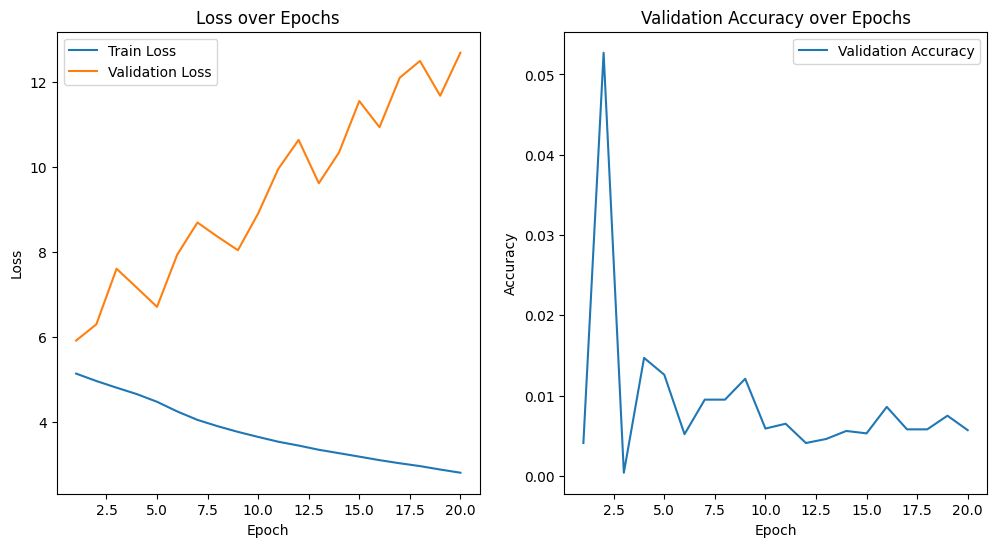

Trening zakończony i wyniki zapisane.


In [10]:
import torch.optim as optim
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from tqdm import tqdm  # Importowanie tqdm do progress bar

# Inicjalizacja modelu, optymalizatora i funkcji straty
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TinyImageNetCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses, val_losses, val_accuracies = [], [], []

# Folder do zapisu wyników
results_folder = 'results/TinyImageNetCNN_1'
os.makedirs(results_folder, exist_ok=True)

# Trening modelu
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    # Pętla z paskiem postępu (progress bar)
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
    
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)  # Używanie CUDA, jeśli jest dostępne
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Aktualizowanie paska postępu z bieżącym loss
        progress_bar.set_postfix(loss=loss.item())
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Ewaluacja na zbiorze walidacyjnym
    model.eval()
    correct, total = 0, 0
    running_val_loss = 0.0
    all_labels, all_preds = [], []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    # Zapis modelu po każdej epoce
    torch.save(model.state_dict(), os.path.join(results_folder, f'model_epoch_{epoch+1}.pth'))

# Zapis wyników treningu do pliku
results = pd.DataFrame({
    'Epoch': list(range(1, num_epochs+1)),
    'Train Loss': train_losses,
    'Validation Loss': val_losses,
    'Validation Accuracy': val_accuracies
})
results.to_csv(os.path.join(results_folder, 'training_results.csv'), index=False)

# Rysowanie wykresów
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.savefig(os.path.join(results_folder, 'training_progress.png'))
plt.show()

print("Trening zakończony i wyniki zapisane.")


Test Accuracy: 0.0039
Testowanie zakończone, wyniki zapisane.


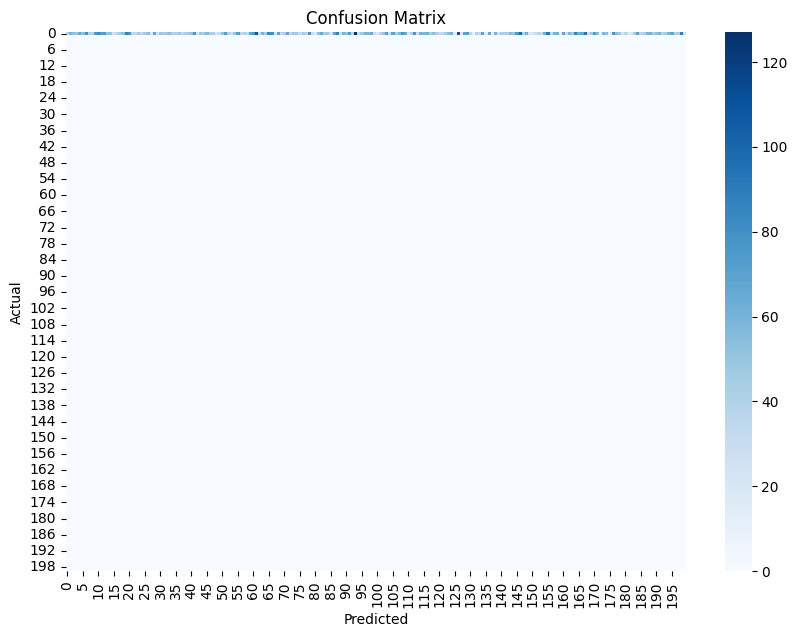

In [11]:
# Ewaluacja modelu na zbiorze testowym
model.eval()
correct, total = 0, 0
all_labels, all_preds = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Obliczenie dokładności
test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generowanie i zapisywanie macierzy konfuzji
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(results_folder, 'confusion_matrix.png'))

# Zapis raportu klasyfikacyjnego
report = classification_report(all_labels, all_preds, zero_division=1)
with open(os.path.join(results_folder, 'classification_report.txt'), 'w') as f:
    f.write(report)

print("Testowanie zakończone, wyniki zapisane.")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.optim import lr_scheduler
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import pandas as pd

# Data Augmentation and Normalization
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(64),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading the datasets
train_dataset = datasets.ImageFolder(root='../tiny-imagenet-200/train', transform=train_transforms)
val_dataset = datasets.ImageFolder(root='../tiny-imagenet-200/val/images', transform=test_transforms)
test_dataset = datasets.ImageFolder(root='../tiny-imagenet-200/test', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Pretrained ResNet18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 200)  # Adjust final layer for 200 classes in Tiny ImageNet
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training and validation
num_epochs = 20
train_losses, val_losses, val_accuracies = [], [], []

results_folder = 'results/TinyImageNetCNN_2'
os.makedirs(results_folder, exist_ok=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    correct, total = 0, 0
    running_val_loss = 0.0
    all_labels, all_preds = [], []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    torch.save(model.state_dict(), os.path.join(results_folder, f'model_epoch_{epoch+1}.pth'))

    scheduler.step()

# Plotting losses and accuracies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig(os.path.join(results_folder, 'training_progress.png'))
plt.show()


c:\Users\msigm\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\msigm\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/20: 100%|██████████| 1563/1563 [01:09<00:00, 22.42it/s, loss=3.96]


Epoch 1/20, Train Loss: 4.3104, Val Loss: 9.5493, Val Accuracy: 0.0024


Epoch 2/20: 100%|██████████| 1563/1563 [01:10<00:00, 22.06it/s, loss=3.84]


Epoch 2/20, Train Loss: 3.8455, Val Loss: 10.8924, Val Accuracy: 0.0040


Epoch 3/20:   0%|          | 0/1563 [00:07<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Transformacje dla danych treningowych i walidacyjnych
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(64),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Ładowanie danych
train_dir = '../tiny-imagenet-200/train'
val_dir = '../tiny-imagenet-200/val/images'
test_dir = '../tiny-imagenet-200/test'

train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset = torchvision.datasets.ImageFolder(root=val_dir, transform=transform_test)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)



import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class AdvancedCNN(nn.Module):
    def __init__(self, num_classes=200):
        super(AdvancedCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.resblock1 = ResidualBlock(64, 128, stride=2)
        self.resblock2 = ResidualBlock(128, 256, stride=2)
        self.resblock3 = ResidualBlock(256, 512, stride=2)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.resblock1(out)
        out = self.resblock2(out)
        out = self.resblock3(out)
        out = self.global_avg_pool(out)
        out = out.view(out.size(0), -1)  # Flatten
        out = self.fc(out)
        return out


In [14]:
import torch.optim as optim
from tqdm import tqdm

# Ustawienia modelu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AdvancedCNN(num_classes=200).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses, val_losses, val_accuracies = [], [], []

results_folder = 'results/AdvancedCNN'
os.makedirs(results_folder, exist_ok=True)

# Trening
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
    
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Ewaluacja na zbiorze walidacyjnym
    model.eval()
    correct, total = 0, 0
    running_val_loss = 0.0
    all_labels, all_preds = [], []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    torch.save(model.state_dict(), os.path.join(results_folder, f'model_epoch_{epoch+1}.pth'))

# Zapis wyników
results = pd.DataFrame({
    'Epoch': list(range(1, num_epochs+1)),
    'Train Loss': train_losses,
    'Validation Loss': val_losses,
    'Validation Accuracy': val_accuracies
})
results.to_csv(os.path.join(results_folder, 'training_results.csv'), index=False)


Epoch 1/20: 100%|██████████| 1563/1563 [01:12<00:00, 21.59it/s, loss=4.34]


Epoch 1/20, Train Loss: 4.5476, Val Loss: 7.4819, Val Accuracy: 0.0211


Epoch 2/20: 100%|██████████| 1563/1563 [01:12<00:00, 21.57it/s, loss=3.73]


Epoch 2/20, Train Loss: 3.9595, Val Loss: 10.1815, Val Accuracy: 0.0034


Epoch 3/20: 100%|██████████| 1563/1563 [01:12<00:00, 21.43it/s, loss=3.47]


Epoch 3/20, Train Loss: 3.6350, Val Loss: 12.0509, Val Accuracy: 0.0035


Epoch 4/20:  86%|████████▌ | 1340/1563 [01:03<00:10, 21.10it/s, loss=3.24]


KeyboardInterrupt: 

In [ ]:
# Ewaluacja modelu na zbiorze testowym
model.eval()
correct, total = 0, 0
all_labels, all_preds = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

# Zapis macierzy konfuzji
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(results_folder, 'confusion_matrix.png'))

# Raport klasyfikacyjny
report = classification_report(all_labels, all_preds, zero_division=1)
with open(os.path.join(results_folder, 'classification_report.txt'), 'w') as f:
    f.write(report)

print("Testowanie zakończone, wyniki zapisane.")


20.09.2024

In [15]:
import os
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Ścieżki do danych
base_dir = '../tiny-imagenet-200'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Transformacje danych
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # zmiana rozmiaru obrazów do 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Ładowanie danych
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Tworzenie DataLoaderów
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Możemy teraz używać train_loader, val_loader i test_loader do treningu i testowania modelu


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

class TinyImageNetCNN(nn.Module):
    def __init__(self):
        super(TinyImageNetCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 200),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Utworzenie modelu
model = TinyImageNetCNN()

# Definicja optymalizatora i funkcji strat
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Możemy teraz przystąpić do treningu modelu


In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
import torch
from torch.utils.data import DataLoader
import time

# Załóżmy, że train_loader i val_loader zostały już zdefiniowane

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model = model.to(device)
    
    for epoch in range(num_epochs):
        model.train()  # Tryb treningu
        running_loss = 0.0
        correct = 0
        total = 0
        
        start_time = time.time()
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        
        # Walidacja
        model.eval()  # Tryb ewaluacji
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        
        val_loss /= len(val_loader)
        val_acc = 100. * correct / total
        
        elapsed_time = time.time() - start_time
        
        print(f'Epoch {epoch+1}/{num_epochs}, Time: {elapsed_time:.2f}s, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

# Przygotowanie modelu, optymalizatora i funkcji strat
model = TinyImageNetCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Rozpoczęcie procesu trenowania
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25)


KeyboardInterrupt: 

In [19]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import time

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model = model.to(device)
    
    for epoch in range(num_epochs):
        model.train()  # Tryb treningu
        running_loss = 0.0
        correct = 0
        total = 0
        
        start_time = time.time()
        
        train_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Training]')
        for images, labels in train_bar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            train_loss = running_loss / total
            train_acc = 100. * correct / total
            train_bar.set_postfix(loss=train_loss, acc=train_acc)
        
        # Walidacja
        model.eval()  # Tryb ewaluacji
        val_loss = 0.0
        correct = 0
        total = 0
        
        val_bar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Validation]')
        with torch.no_grad():
            for images, labels in val_bar:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
                
                val_bar.set_postfix(loss=val_loss / total, acc=100. * correct / total)
        
        elapsed_time = time.time() - start_time
        print(f'Time: {elapsed_time:.2f}s, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss / len(val_loader):.4f}, Val Acc: {100. * correct / total:.2f}%')

# Przygotowanie modelu, optymalizatora i funkcji strat
model = TinyImageNetCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Rozpoczęcie procesu trenowania
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25)


Epoch 1/25 [Training]:   2%|▏         | 29/1563 [00:02<02:08, 11.91it/s, acc=0.485, loss=0.0952]


KeyboardInterrupt: 